# 🎮 Computer game sales analysis
**Author:** Artur Rapacz     
**Cel:** Analysis of game sales trends across various platforms and markets.

In [35]:
# Import of libraries needed for analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("bmh")

In [36]:
#Data loading
df = pd.read_csv('./data/vgsales.csv', index_col='Rank')
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [37]:
#DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [38]:
df.isnull().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [39]:
#Data cleaning
df['Year'] = df['Year'].fillna(0)
df['Publisher'] = df['Publisher'].fillna("Unknown")
df['Year'] = df['Year'].astype(int)


<Axes: title={'center': 'Best-selling games'}, xlabel='Title', ylabel='Number of copies sold [million]'>

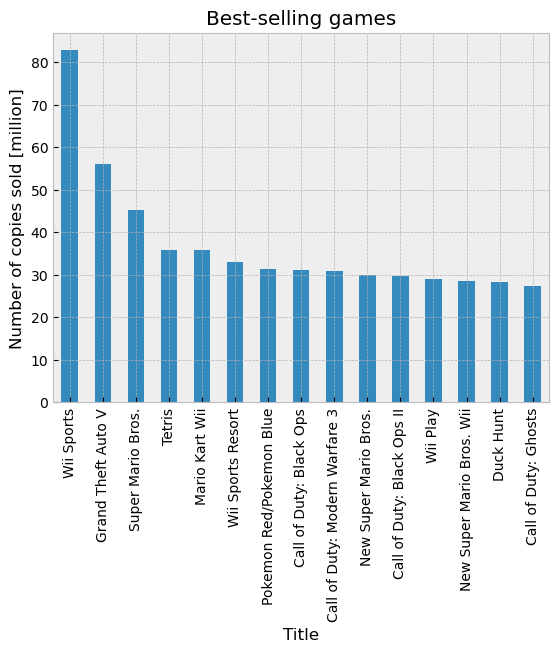

In [40]:
#Best-selling games
totalSales = df.groupby(by='Name')['Global_Sales'].sum().sort_values(ascending=False)
totalSales[:15].plot(kind='bar', xlabel='Title', ylabel='Number of copies sold [million]', title='Best-selling games')

<Axes: title={'center': 'Number of games sold by platform'}, xlabel='Platform', ylabel='Number of copies sold [million]'>

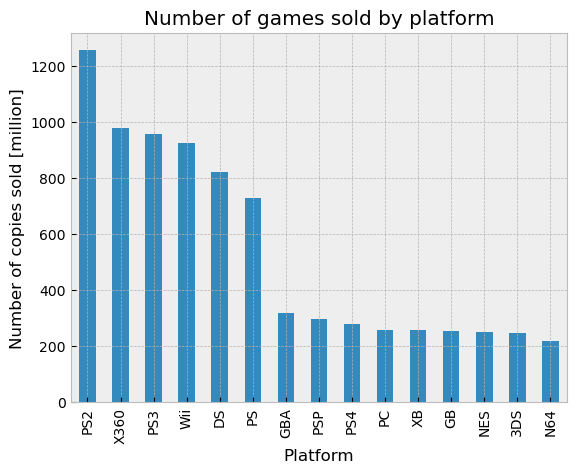

In [41]:
#Number of games sold by platform
platformSales = df.groupby("Platform")['Global_Sales'].sum().sort_values(ascending=False)
platformSales[:15].plot(kind='bar', ylabel='Number of copies sold [million]', xlabel='Platform', title='Number of games sold by platform')

<Axes: title={'center': 'Number of games sold by genre'}, xlabel='Number of copies sold [million]', ylabel='Genre'>

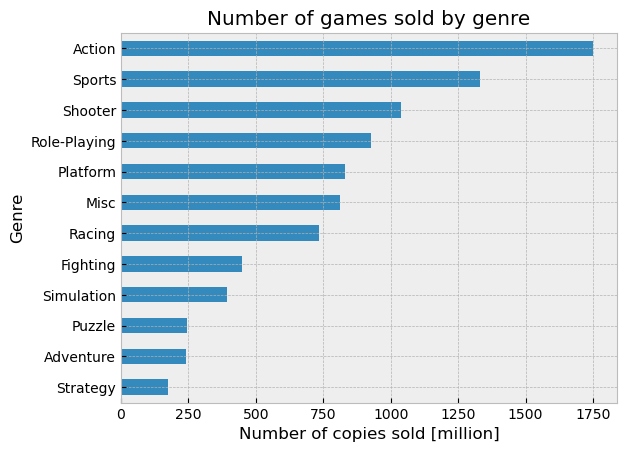

In [42]:
#Number of games sold by genre
genreSales = df.groupby(by='Genre')['Global_Sales'].sum().sort_values(ascending=True)
genreSales.plot(kind='barh', xlabel='Number of copies sold [million]', ylabel='Genre', title='Number of games sold by genre')

<Axes: title={'center': 'Percentage share of markets in sales'}>

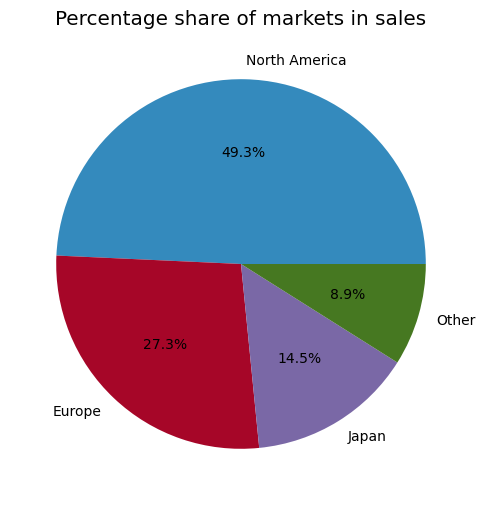

In [43]:
#Percentage share of markets in sales
region_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
df[region_cols].sum().plot(kind='pie', figsize=(6,6), labels=['North America', 'Europe', 'Japan', 'Other'], autopct='%1.1f%%', 
                           title='Percentage share of markets in sales')

<Axes: title={'center': 'Global game sales by year'}, xlabel='Year', ylabel='Number of copies sold [million]'>

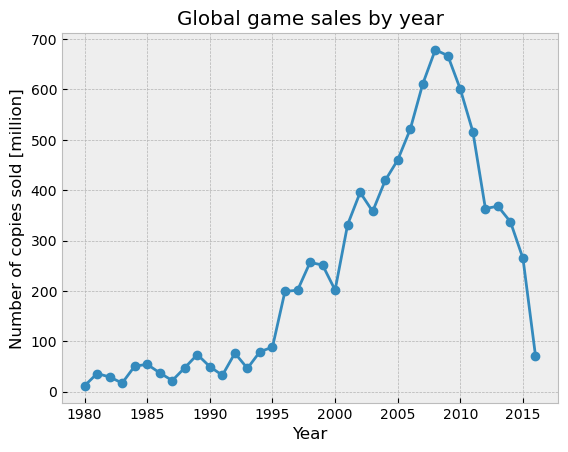

In [44]:
#Global game sales by year
globalSales = df[~df['Year'].isin([0, 2017, 2020])].groupby('Year')['Global_Sales'].sum()
globalSales.plot(title='Global game sales by year', xlabel='Year', ylabel='Number of copies sold [million]',
                marker='o')

## Conclusions
The analysis above shows that the best-selling games of all time are the Wii Sports, Grand Theft Auto V, and Mario series. The most popular platforms in terms of the number of games purchased in the store are the PlayStation 2 and Xbox 360, whose heyday coincided with the enormous growth trend in physical game sales between 2000 and 2008. The subsequent decline can be explained by the increased popularity of digital game purchases. The most popular genres are action, sports, and shooters. Nearly half of the sales volume is in North America, 27% in Europe, and less than 15% in the Japanese market.